## Importing libraries

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


## Logging configurations

In [141]:
import logging

# Set logging configurations
logging.basicConfig(level=logging.DEBUG)

## EDA: Descriptive Statistics

### Read dataset

In [142]:
def read_file(link):
    '''
    This function aims to read a csv file
    '''
    try:
        data = pd.read_csv(link)
        logging.info('✅ Data loaded successfully!')
        return data
    except FileNotFoundError:
        logging.error('❌ File not found.')
        return None

def show_file(data):
    '''
    This function aims to show the first 5 lines of a Pandas dataframe
    '''
    try:
        display(data.head())
    except AttributeError:
        logging.error('❌ It was not possible to show this file.')

data = read_file("./files/heart_disease_prediction.csv")
show_file(data)

INFO:root:✅ Data loaded successfully!


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Types of values

In [143]:
def show_types_and_counts(data):
    '''
    This function aims to show the types of the columns and the quantity of each type in a dataframe
    '''
    try:
        display(data.dtypes)
        display(data.dtypes.value_counts())
    except AttributeError:
        logging.error('❌ It was not possible to show the types of this file.')

show_types_and_counts(data)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

int64      6
object     5
float64    1
dtype: int64

### Description

In [144]:
def show_description(data, include=False):
    '''
    This function aims to show the description of a dataframe
    '''
    try:
        if include:
            display(data.describe(include=['object']))
        else:
            display(data.describe())
    except AttributeError:
        logging.error('❌ It was not possible to show the description of this file.')

show_description(data)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Checking Nan values

In [145]:
def verify_na_values(data):
    '''
    This function aims to verify if there are any missing values in the dataframe
    '''
    nan_counts = data.isna().sum()
    display(nan_counts)

    # Verify if there are Nan values in the columns
    columns_with_nan = nan_counts[nan_counts != 0]
    if not columns_with_nan.empty:
        logging.info("⚠️ There are some columns with some Nan values. They are:")
        for column, count in columns_with_nan.items():
            logging.info("Column %s has %s Nan values.", column, count)
        logging.info("You may have to preprocess these values soon!")

verify_na_values(data)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### EDA: categorical data

In [146]:
show_description(data, include=True)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [149]:
def show_unique_values(columns, data):
    '''
    This function aims to show the unique values for a list of columns of a dataframe
    '''
    try:
        for column in columns:
            display(f'Column {column}:')
            display(data[column].unique())
    except KeyError:
        logging.error("❌ One of the columns passed in the list doesn't exist in the dataframe")

show_unique_values(['FastingBS', 'HeartDisease', 'teste'], data)

'Column FastingBS:'

array([0, 1], dtype=int64)

'Column HeartDisease:'

array([0, 1], dtype=int64)

'Column teste:'

ERROR:root:❌ One of the columns passed in the list doesn't exist in the dataframe


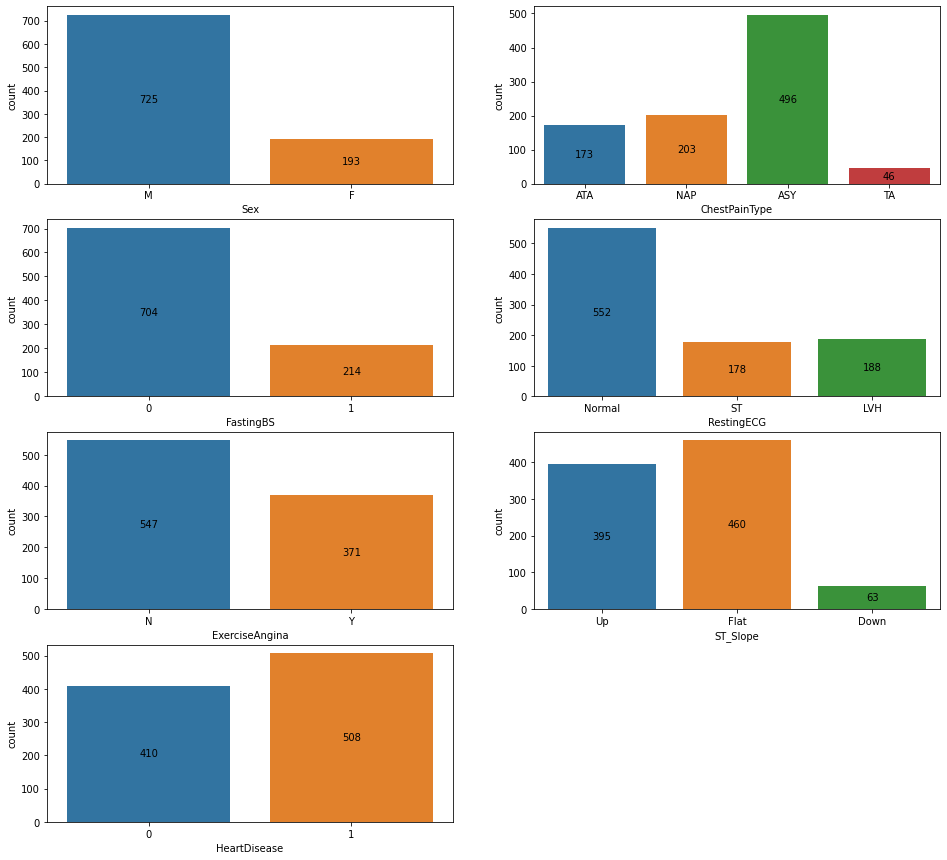

In [150]:
def categorical_plot(cols_list, data):
    '''
    This function aims to show a countplot for categorical columns in a dataframe
    '''
    # Creates the figure
    fig = plt.figure(figsize=(16,15))

    # Computes the number of lines in the plot
    cols = 2
    cols_size = len(cols_list)
    lines = int(cols_size/2) if cols_size % 2 == 0 else int(cols_size/2)+1

    try:
        for idx, col in enumerate(cols_list):
            axis = plt.subplot(lines, cols, idx+1)
            sns.countplot(x=data[col], ax=axis)
            # Add data labels to each bar
            for container in axis.containers:
                axis.bar_label(container, label_type="center")
    except KeyError:
        logging.error('''❌ One of the columns passed in the list
                            doesn't exist in the dataframe''')

categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG",
    "ExerciseAngina", "ST_Slope", "HeartDisease"]
categorical_plot(categorical_cols, data)

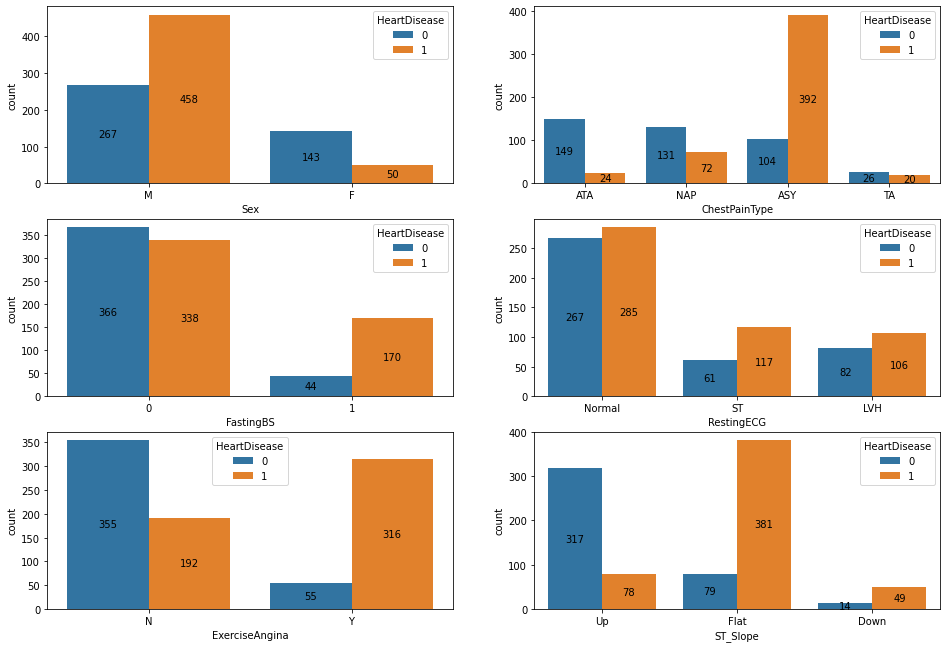

In [151]:
def categorial_plot_by_label(cols_list, label, data):
    '''
    This function aims to show a countplot for categorical columns in a dataframe, 
    making groups according to the label
    '''
    fig = plt.figure(figsize=(16,15))

    # Computes the number of lines in the plot
    cols = 2
    cols_size = len(cols_list)
    lines = int(cols_size/2) if cols_size % 2 == 0 else int(cols_size/2)+1

    try:
        for idx, col in enumerate(cols_list[:-1]):
            axis = plt.subplot(lines, cols, idx+1)
            # Group by the label of the dataframe
            sns.countplot(x=data[col], hue=data[label], ax=axis)
            # Add data labels to each bar
            for container in axis.containers:
                axis.bar_label(container, label_type="center")
    except KeyError:
        logging.error("❌ One of the columns passed in the list doesn't exist in the dataframe")

categorial_plot_by_label(categorical_cols, "HeartDisease", data)

## Data cleaning

In [152]:
def show_zero_values(columns, data):
    '''
    This function is designed to identify and display, for a specific list of columns, 
    those that contain values equal to zero
    '''
    try:
        for column in columns:
            display(column)
            display(data[data[column] == 0])
    except KeyError:
        logging.error("❌ One of the columns passed in the list doesn't exist in the dataframe")

columns = ["RestingBP", "Cholesterol"]
show_zero_values(columns, data)

'RestingBP'

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


'Cholesterol'

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [154]:
# Creates a new copy to start data cleaning
data_clean = data.copy()

# Only keep non-zero values for RestingBP
data_clean = data_clean[data_clean["RestingBP"] != 0]

# Creates a mask according to the value of HeartDisease
mask = data_clean["HeartDisease"]==0

# Selects Cholesterol column according to the mask
cholesterol_without_heartdisease = data_clean.loc[mask, "Cholesterol"]
cholesterol_with_heartdisease = data_clean.loc[~mask, "Cholesterol"]

# Replate values for Cholesterol according to the mask
data_clean.loc[mask, "Cholesterol"] = cholesterol_without_heartdisease.replace(
    to_replace = 0, value = cholesterol_without_heartdisease.median())
data_clean.loc[~mask, "Cholesterol"] = cholesterol_with_heartdisease.replace(
    to_replace = 0, value = cholesterol_with_heartdisease.median())

In [155]:
show_description(data_clean)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,239.700109,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,54.352727,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Feature selection

In [156]:
# Converts categorical columns into indicator columns
data_clean = pd.get_dummies(data_clean, drop_first=True)
show_file(data_clean)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000002434E71DE20>
DEBUG:matplotlib.colorbar:Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000002434E71DE20> on colorbar
DEBUG:matplotlib.colorbar:Setting pcolormesh


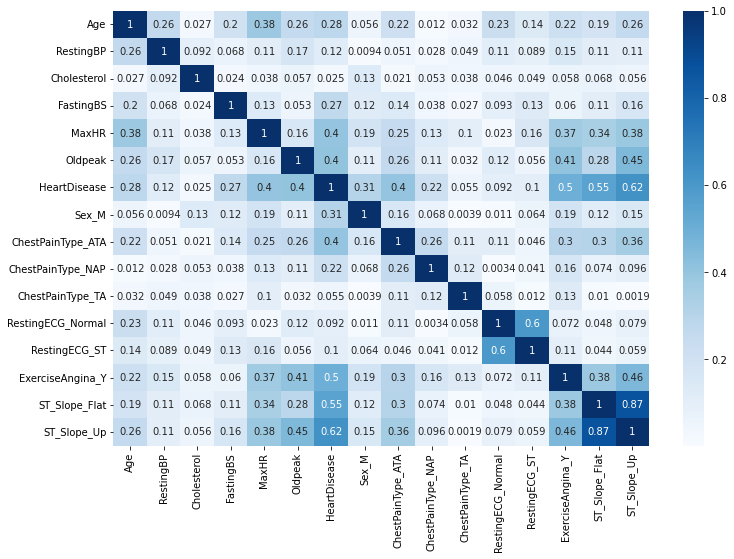

In [161]:
class InvalidLimitCorrelationFilter(Exception):
    '''
    Raised when a invalid limit is used to filter the correlation plot
    '''

def show_correlations(data, limit=None):
    '''
    This function aims to calculate the correlations of a dataframe and plot them
    '''
    try:
        correlations = abs(data.corr())
        plt.figure(figsize=(12,8))
        if limit is not None and (limit < 0 or limit > 1):
            raise InvalidLimitCorrelationFilter('❌ The limit must be between 0 and 1!')
        else:
            if limit is not None:
                    sns.heatmap(correlations[correlations > limit], annot=True, cmap="Blues")
            else:
                sns.heatmap(correlations, annot=True, cmap="Blues")
    except InvalidLimitCorrelationFilter as error:
        print(error)

show_correlations(data_clean)

In [162]:
show_correlations(data_clean, limit=1.3)

❌ The limit must be between 0 and 1!


<Figure size 864x576 with 0 Axes>

## Building a Classifier with One Feature

In [163]:
def separate_features_label(data):
    '''
    This function aims to separate features from the label
    '''
    X = data.drop(["HeartDisease"], axis=1)
    y = data["HeartDisease"]
    return X, y

X, y = separate_features_label(data_clean)
x_train, x_val, y_train, y_val = train_test_split(
    X, y, test_size=0.7, random_state=417)

# Selecting features to apply in KNN
features = ["Oldpeak", "Sex_M", "ExerciseAngina_Y", "ST_Slope_Flat", "ST_Slope_Up"]

In [164]:
def train_knn(features, x_train, y_train, x_val, y_val):
    '''
    This functions aims to build KNN classifiers with one feature and calculate the accuracies
    '''
    for feature in features:
        # Defining the model
        knn = KNeighborsClassifier(n_neighbors = 3)
        logging.info('ℹ️ Starting training with feature %s', feature)
        # Training the model
        knn.fit(x_train[[feature]], y_train)
        # Calculating the accuracy
        accuracy = knn.score(x_val[[feature]], y_val)
        accuracy_formated = round(accuracy*100, 2)
        logging.info('''The k-NN classifier trained on %s and with
                         k = 3 has an accuracy of %s''', feature, accuracy_formated)

train_knn(features, x_train, y_train, x_val, y_val)

INFO:root:ℹ️ Starting training with feature Oldpeak
INFO:root:The k-NN classifier trained on Oldpeak and with
                         k = 3 has an accuracy of 57.63
INFO:root:ℹ️ Starting training with feature Sex_M
INFO:root:The k-NN classifier trained on Sex_M and with
                         k = 3 has an accuracy of 65.26
INFO:root:ℹ️ Starting training with feature ExerciseAngina_Y
INFO:root:The k-NN classifier trained on ExerciseAngina_Y and with
                         k = 3 has an accuracy of 74.45
INFO:root:ℹ️ Starting training with feature ST_Slope_Flat
INFO:root:The k-NN classifier trained on ST_Slope_Flat and with
                         k = 3 has an accuracy of 54.83
INFO:root:ℹ️ Starting training with feature ST_Slope_Up
INFO:root:The k-NN classifier trained on ST_Slope_Up and with
                         k = 3 has an accuracy of 54.83


## Building a Classifier with Multiple Features

In [165]:
# Apply MixMaxScaler to the dataset
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train[features])
x_val_scaled = scaler.transform(x_val[features])

In [166]:
# Trains the KNN model with all features of the dataset
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_scaled, y_train)
accuracy = knn.score(x_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 81.78


## Hyperparameter Optimization

In [137]:
# Grid search to find the best hiperparameters for KNN classifier
grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(x_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [167]:
best_score = knn_grid.best_score_*100
best_params = knn_grid.best_params_
logging.info('The best parameters for KNN are: %s, %s', best_score, best_params)

INFO:root:The best parameters for KNN are: 83.43507030603806, {'metric': 'minkowski', 'n_neighbors': 19}


## Model Evaluation

In [168]:
# Predictions and results on test set
x_test_scaled = scaler.transform(x_val[features])
predictions = knn_grid.best_estimator_.predict(x_test_scaled)
accuracy = accuracy_score(y_val, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 86.29


In [169]:
def comparing_distributions(column, X, x_train, x_val):
    '''
    This function aims to compare the distributions of a column
    in the complete, training and test dataset
    '''

    print(f"Distribution of patients by their {column} in the entire dataset")
    print(X[column].value_counts())

    print(f"\nDistribution of patients by their {column} in the training dataset")
    print(x_train[column].value_counts())

    print(f"\nDistribution of patients by their {column} in the test dataset")
    print(x_val[column].value_counts())

comparing_distributions('Sex_M', X, x_train, x_val)

Distribution of patients by their Sex_M in the entire dataset
1    724
0    193
Name: Sex_M, dtype: int64

Distribution of patients by their Sex_M in the training dataset
1    221
0     54
Name: Sex_M, dtype: int64

Distribution of patients by their Sex_M in the test dataset
1    503
0    139
Name: Sex_M, dtype: int64
